In [121]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline


In [61]:
#Read in Data
df_af = pd.read_excel("Launches.xlsx",sheet_name="Africa")
df_ch = pd.read_excel("Launches.xlsx",sheet_name="China")
df_ru = pd.read_excel("Launches.xlsx",sheet_name="Russia")
df_us = pd.read_excel("Launches.xlsx",sheet_name="USA")

In [20]:
df_af.head()

,INTLDES,NORAD_CAT_ID,OBJECT_TYPE,SATNAME,COUNTRY,LAUNCH,SITE,DECAY,PERIOD,INCLINATION,...,RCSVALUE,RCS_SIZE,FILE,LAUNCH_YEAR,LAUNCH_NUM,LAUNCH_PIECE,CURRENT,OBJECT_NAME,OBJECT_ID,OBJECT_NUMBER
0,1998-067SP,48868,PAYLOAD,MIR-SAT 1,MUS,1998-11-20,TTMTR,NaT,92.48,51.64,...,0,SMALL,7892,1998,67,SP,Y,MIR-SAT 1,1998-067SP,48868
1,2016-059G,41789,PAYLOAD,ALSAT 1N,ALG,2016-09-26,SRI,NaT,98.33,97.95,...,0,SMALL,7870,2016,59,G,Y,ALSAT 1N,2016-059G,41789
2,2016-059C,41785,PAYLOAD,ALSAT 1B,ALG,2016-09-26,SRI,NaT,97.96,97.94,...,0,MEDIUM,7889,2016,59,C,Y,ALSAT 1B,2016-059C,41785
3,2016-059D,41786,PAYLOAD,ALSAT 2B,ALG,2016-09-26,SRI,NaT,98.18,98.00,...,0,MEDIUM,7889,2016,59,D,Y,ALSAT 2B,2016-059D,41786
4,2010-035D,36798,PAYLOAD,ALSAT 2A,ALG,2010-07-12,SRI,NaT,97.95,97.89,...,0,MEDIUM,7890,2010,35,D,Y,ALSAT 2A,2010-035D,36798


In [21]:
df_af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   INTLDES        38 non-null     object        
 1   NORAD_CAT_ID   38 non-null     int64         
 2   OBJECT_TYPE    38 non-null     object        
 3   SATNAME        38 non-null     object        
 4   COUNTRY        38 non-null     object        
 5   LAUNCH         38 non-null     datetime64[ns]
 6   SITE           38 non-null     object        
 7   DECAY          5 non-null      datetime64[ns]
 8   PERIOD         38 non-null     float64       
 9   INCLINATION    38 non-null     float64       
 10  APOGEE         38 non-null     int64         
 11  PERIGEE        38 non-null     int64         
 12  RCSVALUE       38 non-null     int64         
 13  RCS_SIZE       37 non-null     object        
 14  FILE           38 non-null     int64         
 15  LAUNCH_YEAR    38 non-nul

In [22]:
df_af.iloc[0]

INTLDES                   1998-067SP
NORAD_CAT_ID                   48868
OBJECT_TYPE                  PAYLOAD
SATNAME                    MIR-SAT 1
COUNTRY                          MUS
LAUNCH           1998-11-20 00:00:00
SITE                           TTMTR
DECAY                            NaT
PERIOD                         92.48
INCLINATION                    51.64
APOGEE                           399
PERIGEE                          393
RCSVALUE                           0
RCS_SIZE                       SMALL
FILE                            7892
LAUNCH_YEAR                     1998
LAUNCH_NUM                        67
LAUNCH_PIECE                      SP
CURRENT                            Y
OBJECT_NAME                MIR-SAT 1
OBJECT_ID                 1998-067SP
OBJECT_NUMBER                  48868
Name: 0, dtype: object

### TODO

* Filter for Object type: Payload in all dataframes
* Only keep the following variables: Object_type", "Launch Year", "Satname", "Country" and "RCS_size"
* Plot a smoothed stacked area chart 

In [23]:
df_ru

,INTLDES,NORAD_CAT_ID,OBJECT_TYPE,SATNAME,COUNTRY,LAUNCH,SITE,DECAY,PERIOD,INCLINATION,...,RCSVALUE,RCS_SIZE,FILE,LAUNCH_YEAR,LAUNCH_NUM,LAUNCH_PIECE,CURRENT,OBJECT_NAME,OBJECT_ID,OBJECT_NUMBER
0,1957-001A,1,ROCKET BODY,SL-1 R/B,CIS,1957-10-04,TTMTR,1957-12-01,96.19,65.10,...,0,LARGE,1,1957,1,A,Y,SL-1 R/B,1957-001A,1
1,1958-004A,7,ROCKET BODY,SL-1 R/B,CIS,1958-05-15,TTMTR,1958-12-03,102.74,65.14,...,0,NaN,1,1958,4,A,Y,SL-1 R/B,1958-004A,7
2,1958-004B,8,PAYLOAD,SPUTNIK 3,CIS,1958-05-15,TTMTR,1960-04-06,88.43,65.06,...,0,LARGE,1,1958,4,B,Y,SPUTNIK 3,1958-004B,8
3,1959-008A,21,PAYLOAD,LUNA 3,CIS,1959-10-04,TTMTR,1960-04-20,21563.22,55.00,...,0,NaN,1,1959,8,A,Y,LUNA 3,1959-008A,21
4,1960-005A,34,PAYLOAD,SPUTNIK 4,CIS,1960-05-15,TTMTR,1962-09-05,87.82,64.96,...,0,NaN,1,1960,5,A,Y,SPUTNIK 4,1960-005A,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3469,1976-030B,8782,ROCKET BODY,SL-4 R/B,CIS,1976-03-31,PKMTR,1976-04-10,88.10,72.83,...,0,NaN,1,1976,30,B,Y,SL-4 R/B,1976-030B,8782
3470,1976-030C,8783,DEBRIS,SL-4 DEB,CIS,1976-03-31,PKMTR,1976-04-13,89.16,72.84,...,0,NaN,1,1976,30,C,Y,SL-4 DEB,1976-030C,8783
3471,1976-031A,8794,PAYLOAD,COSMOS 812,CIS,1976-04-06,PKMTR,1980-10-30,87.95,73.97,...,0,LARGE,1,1976,31,A,Y,COSMOS 812,1976-031A,8794
3472,1976-028C,8796,DEBRIS,COSMOS 810 DEB,CIS,1976-03-26,PKMTR,1976-04-07,88.02,62.81,...,0,NaN,1,1976,28,C,Y,COSMOS 810 DEB,1976-028C,8796


In [62]:
#variable to drop all columns
#only run once
frames = [df_af,df_ru,df_ch,df_us]

def alter_columns(dataframes):
    for frame in dataframes:
        frame.drop(['INTLDES', 'NORAD_CAT_ID','LAUNCH', 'SITE', 'DECAY',
                            'PERIOD', 'INCLINATION', 'APOGEE', 'PERIGEE',
                            'RCSVALUE', 'FILE', 'LAUNCH_NUM','LAUNCH_PIECE',
                            'CURRENT', 'OBJECT_NAME', 'OBJECT_ID', 'OBJECT_NUMBER'],axis=1,inplace=True)
    return frame
alter_columns(frames)

,OBJECT_TYPE,SATNAME,COUNTRY,RCS_SIZE,LAUNCH_YEAR
0,PAYLOAD,EXPLORER 1,US,NaN,1958
1,PAYLOAD,EXPLORER 3,US,NaN,1958
2,PAYLOAD,EXPLORER 4,US,NaN,1958
3,PAYLOAD,SCORE,US,NaN,1958
4,PAYLOAD,DISCOVERER 1,US,NaN,1959
...,...,...,...,...,...
3277,PAYLOAD,FLOCK 2EP 3,US,SMALL,1998
3278,PAYLOAD,NODES 1,US,SMALL,1998
3279,PAYLOAD,STMSAT 1,US,SMALL,1998
3280,PAYLOAD,MINXSS,US,MEDIUM,1998


In [81]:
#Filter for payloads
[df_af,df_ru,df_ch,df_us] = [i[i.OBJECT_TYPE == "PAYLOAD"] for i in frames]

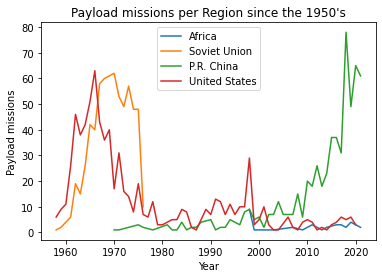

In [110]:
#Only select the "payload" in Object_type
#Make line plot
count = 0
    
for i in [df_af,df_ru,df_ch,df_us]:
    region = ["Africa","Soviet Union","P.R. China","United States"]
    
    i = i.groupby("LAUNCH_YEAR").count().OBJECT_TYPE
    plt.plot(i.index,i.values,label=region[count])
    
    plt.title("Payload missions per Region since the 1950's")
    plt.xlabel("Year")
    plt.ylabel("Payload missions")
    
    count += 1
plt.legend(loc = 0)
plt.show()

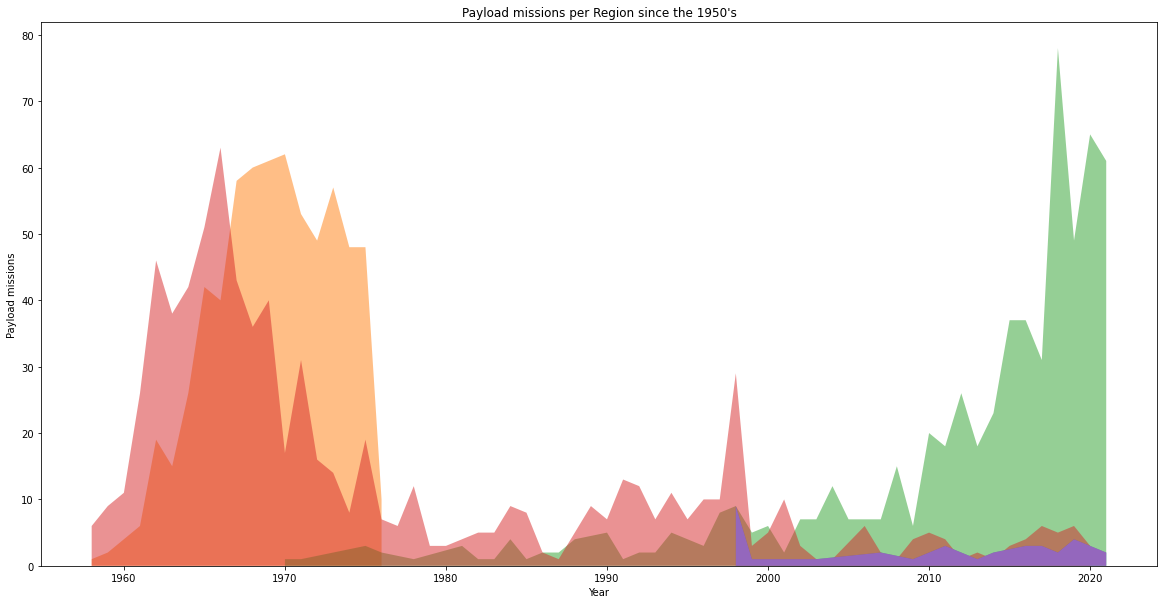

In [144]:
#Only select the "payload" in Object_type
#Make line plot
plt.figure(figsize=(20,10))
region = ["Africa","Soviet Union","P.R. China","United States"]
for i in [df_af,df_ru,df_ch,df_us]:
    
    i = i.groupby("LAUNCH_YEAR").count().OBJECT_TYPE
    plt.stackplot(i.index,i.values,alpha=0.5)
    
    plt.title("Payload missions per Region since the 1950's")
    plt.xlabel("Year")
    plt.ylabel("Payload missions")
    
#raise africa to front
df_af_stack = df_af.groupby("LAUNCH_YEAR").count().OBJECT_TYPE
plt.stackplot(df_af_stack.index,df_af_stack.values)
plt.show()

In [ ]:
#

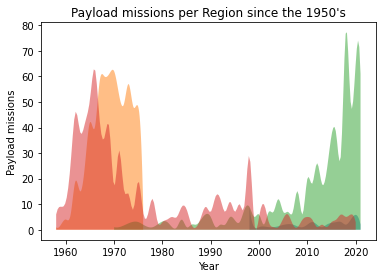

In [154]:
#Smooth y vals
#loop dataframes and create new frames with smoothed y vals
#200 represents number of points to make between T.min and T.max
for i in [df_af,df_ru,df_ch,df_us]:
    i = i.groupby("LAUNCH_YEAR").count().OBJECT_TYPE
    xnew = np.linspace(i.index.min(), i.index.max(), 200) 

    spl = make_interp_spline(i.index, i.values, k=3)  # type: BSpline
    power_smooth = spl(xnew)

    plt.stackplot(xnew, power_smooth,alpha=0.5)
plt.title("Payload missions per Region since the 1950's")
plt.xlabel("Year")
plt.ylabel("Payload missions")
plt.show()

Now... I think the above plot looks ugly, even when smoothed. I want to group the data into two or five year clusters, so that the variance deacreases slightly\

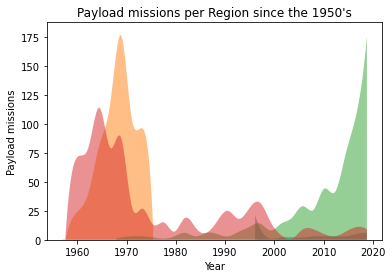

In [228]:
#Split dates into dicrete bins, using pd.cut bin method doesnt create standard bins.
bins = 30
split_dates = np.linspace(1958,2021,bins).round(1)

for i in [df_af,df_ru,df_ch,df_us]:
    #groupby launch year
    i = i.groupby("LAUNCH_YEAR").count().OBJECT_TYPE
    #Cut into bins
    i.index = pd.cut(i.index, split_dates, include_lowest=True,labels=False)
    #rename index, else cant plot
    i.index = split_dates[i.index]
    #group bounds together
    i = i.groupby(i.index).sum()
    #set min value for each dataframe as one less (makes y axis start at 0)
    xnew = np.linspace(i.index.min()-1, i.index.max(), 200) 

    spl = make_interp_spline(i.index, i.values, k=3)  # type: BSpline
    power_smooth = spl(xnew)

    plt.stackplot(xnew, power_smooth,alpha=0.5)
plt.title("Payload missions per Region since the 1950's")
plt.xlabel("Year")
plt.ylabel("Payload missions")
plt.ylim(0)

plt.show()

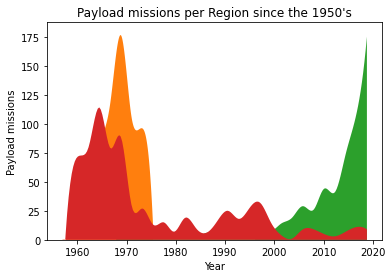

In [230]:
#Split dates into dicrete bins, using pd.cut bin method doesnt create standard bins.
bins = 30
split_dates = np.linspace(1958,2021,bins).round(1)

for i in [df_af,df_ru,df_ch,df_us]:
    #groupby launch year
    i = i.groupby("LAUNCH_YEAR").count().OBJECT_TYPE
    #Cut into bins
    i.index = pd.cut(i.index, split_dates, include_lowest=True,labels=False)
    #rename index, else cant plot
    i.index = split_dates[i.index]
    #group bounds together
    i = i.groupby(i.index).sum()
    #set min value for each dataframe as one less (makes y axis start at 0)
    xnew = np.linspace(i.index.min()-1, i.index.max(), 200) 

    spl = make_interp_spline(i.index, i.values, k=3)  # type: BSpline
    power_smooth = spl(xnew)

    plt.stackplot(xnew, power_smooth)
plt.title("Payload missions per Region since the 1950's")
plt.xlabel("Year")
plt.ylabel("Payload missions")
plt.ylim(0)

plt.savefig("Payloads_over_time.svg")
plt.show()

Simple exploration for story:

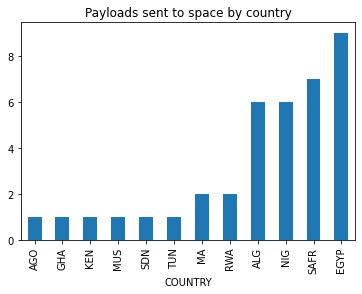

In [55]:
#For story
#Simple histrogram on where 
df_af[df_af.OBJECT_TYPE == "PAYLOAD"].groupby("COUNTRY").count()["OBJECT_TYPE"].sort_values().plot(kind="bar")

plt.title("Payloads sent to space by country")
plt.savefig("Payloads_by_country.svg")
plt.show()